In [1]:
import glob

In [2]:
folders = glob.glob("C:/Users/artem/Downloads/Telegram Desktop/ChatExport*")

In [3]:
files = []
for folder in folders:
    files += glob.glob(f"{folder}/*.html")

In [4]:
from bs4 import BeautifulSoup

In [5]:
messages_all = []
for file in files:
    print(file)
    with open(file, encoding='utf-8') as f:
        soup = BeautifulSoup(f.read(), 'html.parser')
        messages = soup.body.find_all(attrs = {'class':'message'})
        messages= [message.text.split('\n\n')[-2].lower() for message in messages]
    messages_all+=messages
messages_all = list(filter(len, messages_all))

C:/Users/artem/Downloads/Telegram Desktop\ChatExport_2023-02-23\messages.html
C:/Users/artem/Downloads/Telegram Desktop\ChatExport_2023-02-23\messages10.html
C:/Users/artem/Downloads/Telegram Desktop\ChatExport_2023-02-23\messages11.html
C:/Users/artem/Downloads/Telegram Desktop\ChatExport_2023-02-23\messages12.html
C:/Users/artem/Downloads/Telegram Desktop\ChatExport_2023-02-23\messages13.html
C:/Users/artem/Downloads/Telegram Desktop\ChatExport_2023-02-23\messages14.html
C:/Users/artem/Downloads/Telegram Desktop\ChatExport_2023-02-23\messages15.html
C:/Users/artem/Downloads/Telegram Desktop\ChatExport_2023-02-23\messages16.html
C:/Users/artem/Downloads/Telegram Desktop\ChatExport_2023-02-23\messages17.html
C:/Users/artem/Downloads/Telegram Desktop\ChatExport_2023-02-23\messages18.html
C:/Users/artem/Downloads/Telegram Desktop\ChatExport_2023-02-23\messages19.html
C:/Users/artem/Downloads/Telegram Desktop\ChatExport_2023-02-23\messages2.html
C:/Users/artem/Downloads/Telegram Desktop\C

In [78]:
from nltk.tokenize import sent_tokenize

In [79]:
import pandas as pd

In [85]:
df = pd.DataFrame(messages_all, columns=['text'])
df = df.drop_duplicates()

array(['верховный суд признал движение ауе («арестантский уклад един») экстремистской организацией. теперь сама причастность к этой популярной среди молодежи субкультуре грозит уголовной ответственностью.хоть одна хорошая новость\n       ',
       'милена митина on twitter: "король бахрейна прибывает в дубай со своим телохранителем-роботом. он может говорить на 6 языках,драться,преследовать,стрелять. он вооружен пулеметами с боеприпасами, достаточными для борьбы с 1050 людьми. в нем также есть лекарства и вода. охранник обошелся примерно в $7,4 млн https://t.co/fpw6fd8gmf" / twitterhttps://twitter.com/_marsi/status/1295380294237851648',
       'напоминает робота из судья дредд\n       ', ...,
       '\nбожечки, какая приятная информация! благодарю!\n       ',
       'всем привет! есть у кого контакты кто занимается гирудотерапией?\n       ',
       'привет !:)ищу швею ,которая сможет обучить этому волшебному мастерству :)\n       '],
      dtype=object)

In [88]:
target = 'question'
target_list = []
for message in df['text'].values:
    if 'посовет' in message:
        target_list.append(1)
    else:
        target_list.append(0)   

In [89]:
df[target] = target_list

In [91]:
df.shape

(280196, 2)

In [92]:
df['question'].sum()

1716

In [93]:
# len(messages_all)

In [94]:
# messages_all

In [95]:
# sent_tokenize(text, language="russian")

In [96]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [97]:
def tokenize(text):
    stop_words = ['за', 'там', 'так', 'то', 'все', 'если', '-',
       ':', 'но', 'как', 'по', 'у', 'есть', 'это', 'я', 'с', 'а', 'не', ')', 'и', '.', 'в', ',']
    tokens = word_tokenize(text, language="russian")
    tokens = list(filter(lambda x:'посовет' not in x, tokens))
    tokens = list(filter(lambda x: x not in stop_words, tokens))
    
    return list(set(tokens))

In [98]:
df['tokens'] = df['text'].apply(tokenize)

In [99]:
df = df[df['tokens'].apply(len)>=3]

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
df_train, df_test = train_test_split(df, test_size=0.33,random_state=42)

In [102]:
train_lenght = len(df_train)

In [103]:
mean_target = df_train['question'].mean()

In [104]:
from functools import reduce

In [105]:
from collections import Counter

In [106]:
for text in df[df['question']==1]['text'].values:
    pass
    # print(text)
    # print()

In [107]:
# df['question'].sum()

In [108]:
from tqdm import tqdm

In [109]:
total_count = Counter()
for tokens in tqdm(df_train['tokens'].values):
    for token in tokens:
        total_count[token]+=1
    

100%|██████████| 165917/165917 [00:00<00:00, 193587.32it/s]


In [110]:
# total_count

In [111]:
target_count = Counter()
for tokens in tqdm( df_train[df_train[target]==1]['tokens'].values):
    for token in tokens:
        target_count[token]+=1

100%|██████████| 1116/1116 [00:00<00:00, 159396.69it/s]


In [112]:
pd.Series(total_count).sort_values().index[-30:]

Index(['мне', 'подскажите', 'просто', 'будет', 'тут', 'вот', 'привет', 'к',
       'же', 'до', 'нет', 'всем', 'уже', 'от', 'из', 'только', 'да', 'может',
       'поляне', 'ну', 'где', '(', 'для', 'или', 'кто', 'можно', '!', 'что',
       'на', '?'],
      dtype='object')

In [113]:
pd.Series(target_count).sort_values()[-30:]

бы             48
лучше          54
чтобы          55
спасибо        55
адлере         56
вечер          57
куда           60
мастера        60
красной        65
ребят          69
ребята         70
сочи           78
(              93
день           98
хорошего      104
что           111
для           122
можно         132
добрый        136
кто           147
где           158
или           172
может         174
всем          207
привет        235
поляне        241
!             287
на            298
пожалуйста    298
?             407
dtype: int64

In [114]:
pd.Series(target_count).sort_values().iloc[-50:].index

Index(['ещё', 'баню', 'уже', 'доброе', 'хорошую', '🙏', 'только', 'сегодня',
       'мне', 'кто-то', 'тут', 'от', 'могу', 'кп', 'здравствуйте', 'можете',
       'хороший', 'нужно', 'из', 'друзья', 'бы', 'лучше', 'чтобы', 'спасибо',
       'адлере', 'вечер', 'куда', 'мастера', 'красной', 'ребят', 'ребята',
       'сочи', '(', 'день', 'хорошего', 'что', 'для', 'можно', 'добрый', 'кто',
       'где', 'или', 'может', 'всем', 'привет', 'поляне', '!', 'на',
       'пожалуйста', '?'],
      dtype='object')

In [136]:
# total_count

In [137]:
# tokens = df_test['tokens'].iloc[0]

In [138]:
# pd.Series(target_count.values()).value_counts()

In [139]:
def predict(tokens):
    p = 1.0
    for token in tokens:
        p = p*(target_count[token])/(total_count[token]+0.0001)
    return p

In [140]:
df_test['score'] = df_test['tokens'].apply(predict)

In [141]:
# df_test.sort_values('score').iloc[-100:]

In [142]:
# df_test.sort_values('score')

In [143]:
from sklearn.metrics import roc_auc_score

In [144]:
roc_auc_score(df_test[target], df_test['score'])

0.5541344735944926

In [145]:
df_test['score'].max()

0.013441377779033524

In [146]:
vc = df[df[target]==1]['tokens'].apply(len).value_counts()

In [147]:
import matplotlib.pyplot as plt

In [148]:
# vc.sort_index()

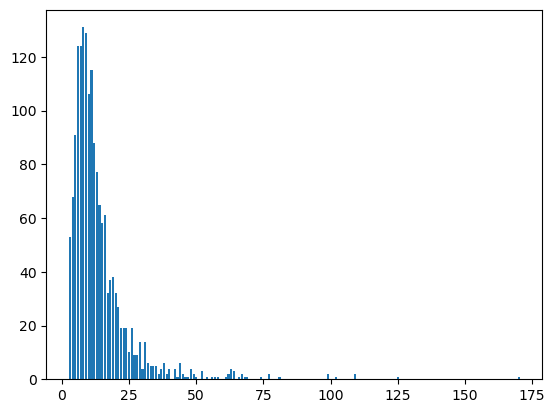

In [149]:
plt.bar(vc.index, vc.values)
plt.show()

In [150]:
# df['text'].value_counts().iloc[-20:100]

In [151]:
df_test[df_test['tokens'].apply(len)>3].sort_values('score').iloc[-100:]

,text,question,tokens,score
270508,чтобы был спа и тп\n,0,"[тп, чтобы, спа, был]",7.786132e-08
226058,"а так, в бассейн ещё можно сгонять)\n",0,"[бассейн, можно, ещё, сгонять]",7.842899e-08
234186,где потанцевать на розе\n,0,"[потанцевать, розе, на, где]",8.025291e-08
241818,\nа где его лечат?))\n,0,"[его, лечат, ?, где]",8.270930e-08
262343,"\nв адлере, ул. кирова, 50\n",0,"[адлере, 50, кирова, ул.]",8.468991e-08
10600,"(тут все гора, если не адлер)\n",0,"[адлер, тут, (, гора]",8.550085e-08
299870,\nесть рафтинг на розе хутор\n,0,"[рафтинг, розе, хутор, на]",8.669174e-08
56981,2 месяца обучения питона\n,0,"[обучения, питона, 2, месяца]",8.791308e-08
96939,"все собаки адекватные, если с ними адекватно\n...",0,"[ними, адекватные, собаки, адекватно]",8.824560e-08
113682,\nинтернет поиском можно воспользоваться\n,0,"[поиском, воспользоваться, можно, интернет]",8.971363e-08


In [131]:
# df_test[df_test['question']==1]

In [153]:
stat = {}

for key, val in target_count.items():
    if val>=3:
        rate = (val+eps)/(total_count[key]+1)
        stat[key] = rate

In [159]:
pd.Series(stat).sort_values().iloc[-40:]

уютные               0.222278
туристического       0.230846
мануального          0.230846
швею                 0.230846
маникюра             0.235324
психолога            0.240040
остеопата            0.242455
проверенный          0.250031
толкового            0.250036
толп                 0.250063
массажиста           0.253177
стоматологию         0.269269
маникюру             0.269269
недорогую            0.272773
подберем             0.272818
автошколу            0.272818
грумера              0.307769
хирурга              0.333389
парикмахерскую       0.333444
качественное         0.333444
дельного             0.333444
кальянную            0.357214
уборщицу             0.363727
невролога            0.363727
горничную            0.375125
стоматолога          0.391326
волосам              0.428714
барбера              0.437563
проверенную          0.454636
транспортную         0.454636
отельчик             0.500167
ортодонта            0.571571
+79384909991         0.600200
🦷         

In [133]:
pd.options.display.max_rows = 500

In [134]:
pd.Series(stat).sort_values().iloc[-200:]

свалилмашина                                     0.500500
намазки                                          0.500500
сочи/поляна                                      0.500500
айфон❤️                                          0.500500
🥳может                                           0.500500
человечка                                        0.500500
22е                                              0.500500
дверей🚪                                          0.500500
смешенным                                        0.500500
бюджетнон                                        0.500500
взрослого.посмотрела                             0.500500
8:00-22:00                                       0.500500
gewerbe                                          0.500500
steuerberater                                    0.500500
банкарта                                         0.500500
биржевого                                        0.500500
плеча/                                           0.500500
кто/что       

In [135]:
df[df['text'].apply(lambda x: 'используешь' in x)]

,text,question,tokens
7126,@tr4dr ты вроде на первой встрече айтишников г...,1,"[всё, заложен, встрече, ок, только, дома, гово..."
12859,"с другой стороны, я видел позицию что если ты ...",0,"[используешь, позицию, другой, какой, супер, о..."
20899,\nты front? какой фреймворк используешь?\n ...,0,"[front, используешь, ты, фреймворк, какой, ?]"
34157,а модели мл не используешь для возможного пред...,0,"[используешь, мл, модели, предсказания, возмож..."
36261,смешно если ты используешь крутой пароль а на ...,0,"[используешь, пароль, на, симке, смешно, пинко..."
42259,"\nа ты клёвый - говоришь о ништяковом ""нет про...",0,"[``, её, уж, 🤷‍♂, бизнес-процессы, нет, могу, ..."
46872,\nну там депрекейтеды выпиливаются очень не бы...,0,"[(, 13й, поэтому, только, уже, что, апи, выпил..."
47144,\nвариант с defined теоретически ок )вопрос гд...,0,"[тобой, внутри, от, модуля, ок, defined, завтр..."
58868,\nинтересно надо попробовать? а мобильную плат...,0,"[попробовать, используешь, чего, платформу, 1с..."
62754,\nя знаю разницу... вопрос был когда используе...,0,"[используешь, моих, использую, был, вопрос, ко..."


In [54]:
from sklearn.metrics import roc_auc_score

In [55]:
p

NameError: name 'p' is not defined

In [ ]:
aa

In [ ]:
P( w | c ) = [ count( w, c ) + 1 ] / [ count( c ) + |V| ]